In [1]:
# 1. Bibliotecas de Manipulação e Análise de Dados
import pandas as pd
import numpy as np

# 2. Bibliotecas para visualização de Dados
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Módulos do Scikit-learn (pós-processamento e modelagem)
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 4. Modelos de Machine Learning (classificação)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# 5. Métricas de avaliação dos modelos
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# 6. Interpretação de Modelos
import shap

# 7. Manipulação de arquivos e caminhos
import os
import shutil

# 8. Datasets do Kaggle
import kagglehub

# 9. Utilitários
import sklearn
import warnings
warnings.filterwarnings('ignore')


# --- Visualização dos Dados ---
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style("whitegrid")
plt.style.use("seaborn-v0_8-darkgrid")

# --- Visualização de confirmação da importação e versões ---
print("Importações de bibliotecas e configurações iniciais concluídas com sucesso!")
print(f"Versão do Pandas: {pd.__version__}")
print(f"Versão do NumPy: {np.__version__}")
print(f"Versão do Scikit-learn: {sklearn.__version__}")

Importações de bibliotecas e configurações iniciais concluídas com sucesso!
Versão do Pandas: 2.2.3
Versão do NumPy: 2.0.0
Versão do Scikit-learn: 1.6.1


## Introdução ao Diagnóstico de Doença Cardíaca com Machine Learning

A Doença Cardíaca, em suas diversas formas (como doença arterial coronariana, insuficiência cardíaca, arritmias, etc.), representa uma das principais causas de morbidade e mortalidade em nível global. O diagnóstico precoce e preciso é fundamental para a intervenção médica oportuna e para a melhoria dos prognósticos dos pacientes. No entanto, o processo diagnóstico muitas vezes envolve a análise de múltiplos fatores de risco (idade, histórico familiar, estilo de vida) e uma variedade de exames clínicos e laboratoriais (pressão arterial, níveis de colesterol, eletrocardiogramas, entre outros).

A complexidade e o volume de informações envolvidas no diagnóstico de doenças cardíacas tornam-nas um campo promissor para a aplicação de ferramentas de Inteligência Artificial e Machine Learning. A capacidade desses algoritmos de identificar padrões complexos em grandes conjuntos de dados pode auxiliar os profissionais de saúde na triagem de pacientes, na avaliação de risco e no suporte à decisão clínica.

Este segmento do projeto foca na construção de um modelo de Machine Learning capaz de prever a presença de doença cardíaca com base em um conjunto de atributos clínicos e demográficos de pacientes. Nosso objetivo é demonstrar como a IA pode ser utilizada para processar e analisar dados médicos tabulares, fornecendo uma estimativa de risco que pode otimizar o fluxo de trabalho hospitalar e apoiar os médicos na identificação de pacientes que necessitam de atenção prioritária.

---

## 1. Carregamento da Base de Dados e Exploração Inicial - Doença Cardíaca

Nesta seção, realizamos as etapas iniciais de carregamento e exploração do dataset de Doença Cardíaca. O objetivo é compreender a estrutura dos dados, identificar tipos de variáveis (numéricas e categóricas), verificar a presença de valores ausentes e obter uma visão geral das distribuições das características, com foco especial na variável alvo (`target`).

### 1.1. Carregamento do Dataset

O dataset será baixado programaticamente do Kaggle utilizando a biblioteca `kagglehub`. Para que o download funcione, é necessário que as credenciais da API do Kaggle estejam configuradas via o arquivo `kaggle.json` no diretório `~/.kaggle/` (ou `C:\Users\SeuUsuario\.kaggle\` no Windows). Após o download para um cache temporário, o arquivo CSV será movido para a pasta `data/` do projeto para acesso local e posterior carregamento em um DataFrame do Pandas.

In [2]:
dataset_id_cardiaca = "rishidamarla/heart-disease-prediction"
local_data_path = '../data/'

df_cardiaca = None

print(f"Iniciando download do dataset: {dataset_id_cardiaca}...")

os.makedirs(local_data_path, exist_ok=True)

try:
    source_csv_name = 'Heart_Disease_Prediction.csv'
    destination_csv_path = os.path.join(local_data_path, source_csv_name)

    if os.path.exists(destination_csv_path):
        print(f"Arquivo '{source_csv_name}' já existe em '{destination_csv_path}'. Pulando download/movimento.")
        df_cardiaca = pd.read_csv(destination_csv_path)
        print(f"Dataset '{source_csv_name}' carregado para o DataFrame 'df_cardiaca' com sucesso (arquivo já existia)!")
    else:
        download_path = kagglehub.dataset_download(dataset_id_cardiaca)
        print(f"Dataset baixado temporariamente para o cache: {download_path}")
        source_csv_path = os.path.join(download_path, source_csv_name)

        if os.path.exists(source_csv_path):
            shutil.move(source_csv_path, destination_csv_path)
            print(f"Arquivo '{source_csv_name}' movido para: {destination_csv_path}")
            df_cardiaca = pd.read_csv(destination_csv_path)
            print(f"Dataset '{source_csv_name}' carregado para o DataFrame 'df_cardiaca' com sucesso (arquivo movido)!")
        else:
            print(f"Erro: '{source_csv_name}' não encontrado em {source_csv_path} após o download. Verifique a estrutura do dataset baixado.")

    if df_cardiaca is not None and 'Heart Disease' in df_cardiaca.columns:
        df_cardiaca['Heart Disease'] = df_cardiaca['Heart Disease'].map({'Presence': 1, 'Absence': 0})
        print("Coluna 'Heart Disease' convertida para numérica (1=Presence, 0=Absence) com sucesso.")
    elif df_cardiaca is not None:
        print("Aviso: Coluna 'Heart Disease' não encontrada para conversão.")

except Exception as e:
    print(f"Um erro inesperado ocorreu durante o download ou carregamento do dataset de Doença Cardíaca: {e}")
    print("Por favor, verifique suas credenciais Kaggle (kaggle.json) e conexão com a internet.")
    df_cardiaca = None

Iniciando download do dataset: rishidamarla/heart-disease-prediction...
Arquivo 'Heart_Disease_Prediction.csv' já existe em '../data/Heart_Disease_Prediction.csv'. Pulando download/movimento.
Dataset 'Heart_Disease_Prediction.csv' carregado para o DataFrame 'df_cardiaca' com sucesso (arquivo já existia)!
Coluna 'Heart Disease' convertida para numérica (1=Presence, 0=Absence) com sucesso.


### 1.2. Primeiras Linhas do Dataset

Uma visão inicial das primeiras linhas do DataFrame nos ajuda a entender a estrutura dos dados, os nomes das colunas e os tipos de valores que cada uma contém.

In [3]:
if df_cardiaca is not None:
    print("--- Primeiras 5 linhas do dataset de Doença Cardíaca ---")
    print(df_cardiaca.head())
else:
    print("DataFrame 'df_cardiaca' não foi carregado.")

--- Primeiras 5 linhas do dataset de Doença Cardíaca ---
   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium  Heart Disease  
0                        3         3              1  
1                      

### 1.3. Informações Gerais do Dataset

O método `.info()` fornece um resumo conciso do DataFrame, incluindo o número de entradas, o número de colunas, a contagem de valores não nulos em cada coluna e o tipo de dado de cada coluna. Isso é crucial para identificar valores ausentes e tipos de dados incorretos.

In [4]:
if df_cardiaca is not None:
    print("\n--- Informações gerais do dataset de Doença Cardíaca ---")
    df_cardiaca.info()
else:
    print("DataFrame 'df_cardiaca' não foi carregado.")


--- Informações gerais do dataset de Doença Cardíaca ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease         

### 1.4. Estatísticas Descritivas das Colunas Numéricas

O método `.describe()` gera estatísticas descritivas (contagem, média, desvio padrão, mínimo, quartis e máximo) para as colunas numéricas do DataFrame. Isso nos dá uma ideia da distribuição e escala de cada feature.

In [5]:
if df_cardiaca is not None:
    print("\n--- Estatísticas descritivas do dataset de Doença Cardíaca ---")
    print(df_cardiaca.describe())
else:
    print("DataFrame 'df_cardiaca' não foi carregado.")


--- Estatísticas descritivas do dataset de Doença Cardíaca ---
              Age         Sex  Chest pain type          BP  Cholesterol  \
count  270.000000  270.000000       270.000000  270.000000   270.000000   
mean    54.433333    0.677778         3.174074  131.344444   249.659259   
std      9.109067    0.468195         0.950090   17.861608    51.686237   
min     29.000000    0.000000         1.000000   94.000000   126.000000   
25%     48.000000    0.000000         3.000000  120.000000   213.000000   
50%     55.000000    1.000000         3.000000  130.000000   245.000000   
75%     61.000000    1.000000         4.000000  140.000000   280.000000   
max     77.000000    1.000000         4.000000  200.000000   564.000000   

       FBS over 120  EKG results      Max HR  Exercise angina  ST depression  \
count    270.000000   270.000000  270.000000       270.000000      270.00000   
mean       0.148148     1.022222  149.677778         0.329630        1.05000   
std        0.355906 

### 1.5. Verificação de Valores Ausentes

É fundamental verificar a presença de valores nulos (`NaN`) no dataset, pois eles podem impactar negativamente o treinamento dos modelos. Esta etapa identifica quais colunas possuem dados faltantes e em que quantidade.

In [6]:
if df_cardiaca is not None:
    print("\n--- Contagem de valores ausentes por coluna no dataset de Doença Cardíaca ---")
    print(df_cardiaca.isnull().sum())
else:
    print("DataFrame 'df_cardiaca' não foi carregado.")


--- Contagem de valores ausentes por coluna no dataset de Doença Cardíaca ---
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


### 1.6. Contagem de Valores Únicos

A contagem de valores únicos por coluna ajuda a identificar variáveis categóricas (aquelas com um número limitado de valores distintos) e a verificar a cardinalidade das features.

In [7]:
if df_cardiaca is not None:
    print("\n--- Contagem de valores únicos por coluna no dataset de Doença Cardíaca ---")
    print(df_cardiaca.nunique())
else:
    print("DataFrame 'df_cardiaca' não foi carregado.")


--- Contagem de valores únicos por coluna no dataset de Doença Cardíaca ---
Age                         41
Sex                          2
Chest pain type              4
BP                          47
Cholesterol                144
FBS over 120                 2
EKG results                  3
Max HR                      90
Exercise angina              2
ST depression               39
Slope of ST                  3
Number of vessels fluro      4
Thallium                     3
Heart Disease                2
dtype: int64


In [8]:
if df_cardiaca is not None:
    print("\n--- Nomes de Todas as Colunas no DataFrame df_cardiaca ---")
    print(df_cardiaca.columns)
else:
    print("DataFrame 'df_cardiaca' não carregado. Não é possível verificar colunas.")


--- Nomes de Todas as Colunas no DataFrame df_cardiaca ---
Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')


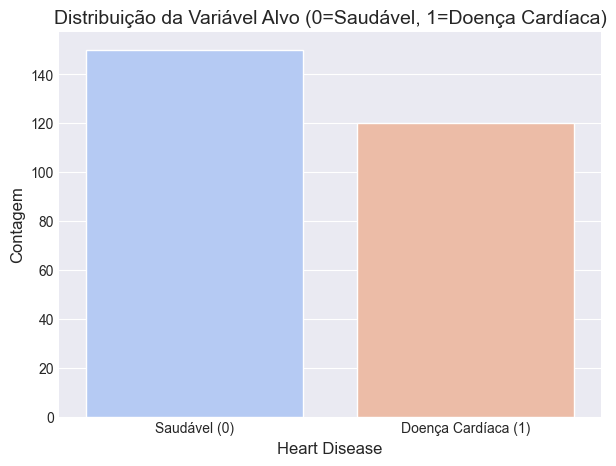


--- Proporção de Classes na Variável Alvo da Doença Cardíaca ---
Heart Disease
0    55.555556
1    44.444444
Name: proportion, dtype: float64


In [9]:
if df_cardiaca is not None:
    plt.figure(figsize=(7, 5))
    sns.countplot(x='Heart Disease', data=df_cardiaca, palette='coolwarm')
    plt.title('Distribuição da Variável Alvo (0=Saudável, 1=Doença Cardíaca)', fontsize=14)
    plt.xlabel('Heart Disease', fontsize=12)
    plt.ylabel('Contagem', fontsize=12)
    plt.xticks(ticks=[0, 1], labels=['Saudável (0)', 'Doença Cardíaca (1)'])
    plt.show()

    target_counts_cardiaca = df_cardiaca['Heart Disease'].value_counts(normalize=True) * 100
    print("\n--- Proporção de Classes na Variável Alvo da Doença Cardíaca ---")
    print(target_counts_cardiaca)
else:
    print("DataFrame 'df_cardiaca' não carregado.")

## 2. Pré-processamento de Dados - Doença Cardíaca

A etapa de pré-processamento é fundamental para transformar os dados brutos em um formato adequado para os algoritmos de Machine Learning. Para o dataset de Doença Cardíaca, esta fase incluirá a identificação da variável alvo, o tratamento de features categóricas (usando codificação One-Hot) e o escalonamento das features numéricas.

### 2.1. Identificação da Variável Alvo e Features

Primeiramente, separamos o dataset entre as variáveis preditoras (features, X) e a variável alvo (target, y), que é a coluna `'Heart Disease'`. Nenhuma coluna será descartada neste momento, pois todas as demais são consideradas features relevantes para o diagnóstico.

In [10]:
if df_cardiaca is not None:
    y = df_cardiaca['Heart Disease']

    X = df_cardiaca.drop('Heart Disease', axis=1)

    print(f"Formato das features (X): {X.shape}")
    print(f"Formato da variável alvo (y): {y.shape}")
    print("\nVariáveis preditoras (X) e Variável Alvo (y) separadas com sucesso.")
else:
    print("DataFrame de Doença Cardíaca não carregado. Não é possível separar features e alvo.")

Formato das features (X): (270, 13)
Formato da variável alvo (y): (270,)

Variáveis preditoras (X) e Variável Alvo (y) separadas com sucesso.


### 2.2. Pipeline de Pré-processamento: Tratamento de Variáveis Categóricas e Escalonamento Numérico

O dataset de Doença Cardíaca contém tanto variáveis numéricas quanto categóricas. Para preparar esses dados para a modelagem, aplicaremos transformações específicas para cada tipo:

* **Variáveis Categóricas:** Serão convertidas em um formato numérico utilizando o `OneHotEncoder`. Isso cria novas colunas binárias para cada categoria, evitando que o modelo interprete categorias como tendo uma ordem inerente.
* **Variáveis Numéricas:** Serão padronizadas usando o `StandardScaler` (média 0, desvio padrão 1), o que é essencial para modelos sensíveis à escala das features.

Ambas as transformações serão encapsuladas em um `ColumnTransformer` dentro de um `Pipeline` completo. Isso garante que o pré-processamento seja aplicado de forma consistente e automatizada durante o treinamento e a previsão.

In [11]:
numerical_features = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Number of vessels fluro']
categorical_features = ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST', 'Thallium']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("Pipeline de pré-processamento criado com StandardScaler para numéricas e OneHotEncoder para categóricas.")

Pipeline de pré-processamento criado com StandardScaler para numéricas e OneHotEncoder para categóricas.


### 2.2.1. Verificação do Pré-processamento nos Dados de Treino

Para garantir que o pipeline de pré-processamento está aplicando as transformações corretamente (escalonamento e codificação One-Hot), vamos aplicar o `preprocessor` a uma amostra dos dados de treino e inspecionar o resultado. Isso é importante para visualizar como as features serão apresentadas aos modelos.

In [12]:
if 'X' in locals() and 'y' in locals() and X is not None and y is not None:
    X_train_temp, _, _, _ = train_test_split(X, y, test_size=0.2, random_state=42)

    if 'preprocessor' in locals():
        X_train_processed_array = preprocessor.fit_transform(X_train_temp)

        numerical_features = X.select_dtypes(include=np.number).columns.tolist()
        categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

        all_columns = X.columns.tolist()

        numerical_features_final = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Number of vessels fluro']

        categorical_features_final = [col for col in all_columns if col not in numerical_features_final]

        numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
        categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
        preprocessor_for_check = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numerical_features_final),
                ('cat', categorical_transformer, categorical_features_final)
            ])

        X_train_processed_array = preprocessor_for_check.fit_transform(X_train_temp)

        ohe_feature_names = preprocessor_for_check.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features_final)

        processed_feature_names = numerical_features_final + ohe_feature_names.tolist()

        print("\n--- Amostra dos Dados de Treino Processados (Escalonados e One-Hot Encoded) ---")
        print(pd.DataFrame(X_train_processed_array, columns=processed_feature_names).head())

        print("\n--- Média e Desvio Padrão das Features Numéricas Processadas (Devem ser próximos de 0 e 1) ---")
        df_processed_temp = pd.DataFrame(X_train_processed_array, columns=processed_feature_names)
        print(df_processed_temp[numerical_features_final].agg(['mean', 'std']).T)

        print("\nVerificação do pré-processamento concluída. Observe os novos nomes das features categóricas e as escalas das numéricas.")
    else:
        print("Pré-processador não definido. Verifique a Célula 10.")
else:
    print("X ou y não definidos. Não é possível verificar o pré-processamento.")


--- Amostra dos Dados de Treino Processados (Escalonados e One-Hot Encoded) ---
        Age        BP  Cholesterol    Max HR  ST depression  \
0 -0.632970  0.125095     0.406391  0.566128      -0.934304   
1  0.465195  2.143222     1.478549 -0.397771       1.959634   
2 -0.193704 -0.099142    -0.080953  1.048078      -0.934304   
3 -0.523153  0.461449    -0.334372  0.609942      -0.423609   
4 -0.083888 -1.220323    -0.704754  0.390874       0.427549   

   Number of vessels fluro  Sex_0  Sex_1  Chest pain type_1  \
0                -0.714584    1.0    0.0                0.0   
1                -0.714584    0.0    1.0                0.0   
2                 2.414135    0.0    1.0                0.0   
3                 0.328322    0.0    1.0                0.0   
4                -0.714584    1.0    0.0                0.0   

   Chest pain type_2  Chest pain type_3  Chest pain type_4  FBS over 120_0  \
0                1.0                0.0                0.0             1.0   
1    

### 2.3. Análise de Correlação

A análise de correlação é vital para entender as relações lineares entre as features, e entre as features e a variável alvo. Isso nos ajuda a identificar possíveis multicolinearidades (features altamente correlacionadas entre si) e a força das associações com a presença de Doença Cardíaca. Utilizaremos um mapa de calor (heatmap) para visualizar a matriz de correlação.

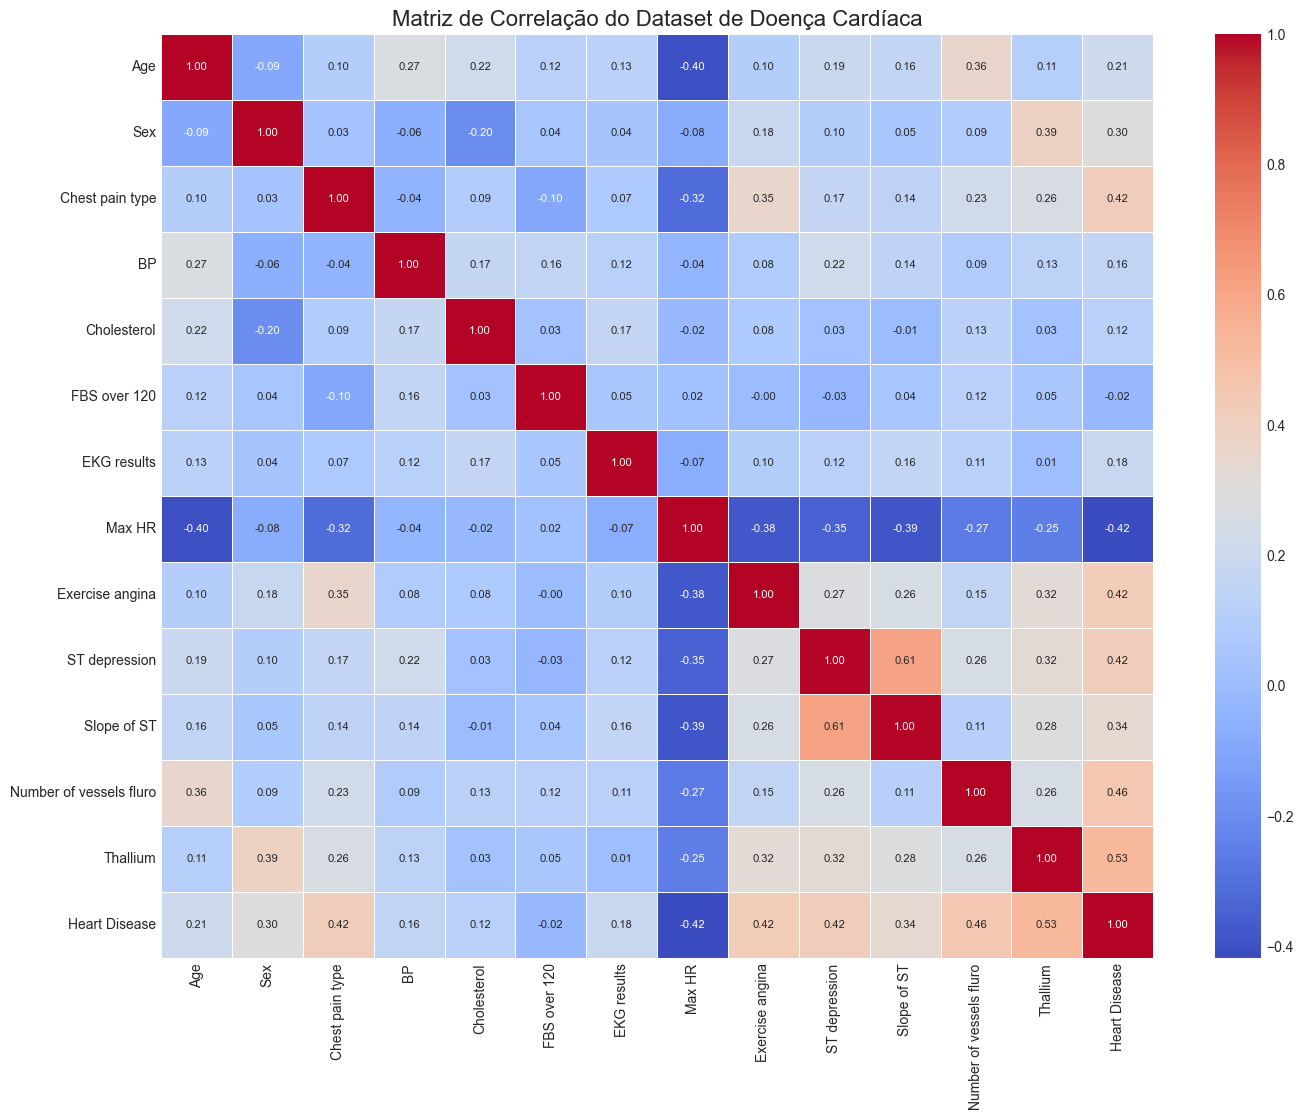


--- Correlação das Features com a Variável Alvo ('Heart Disease') ---
Heart Disease              1.000000
Thallium                   0.525020
Number of vessels fluro    0.455336
Exercise angina            0.419303
ST depression              0.417967
Chest pain type            0.417436
Slope of ST                0.337616
Sex                        0.297721
Age                        0.212322
EKG results                0.182091
BP                         0.155383
Cholesterol                0.118021
FBS over 120              -0.016319
Max HR                    -0.418514
Name: Heart Disease, dtype: float64


In [13]:
if df_cardiaca is not None:

    correlation_matrix_cardiaca = df_cardiaca.corr(numeric_only=True)

    plt.figure(figsize=(16, 12))
    sns.heatmap(correlation_matrix_cardiaca, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
    plt.title('Matriz de Correlação do Dataset de Doença Cardíaca', fontsize=16)
    plt.show()

    print("\n--- Correlação das Features com a Variável Alvo ('Heart Disease') ---")
    print(correlation_matrix_cardiaca['Heart Disease'].sort_values(ascending=False))
else:
    print("DataFrame de Doença Cardíaca não carregado. Não é possível realizar a análise de correlação.")

## 3. Modelagem - Doença Cardíaca

Nesta seção, prepararemos os dados para a modelagem, dividindo-os em conjuntos de treino e teste. Em seguida, criaremos e treinaremos diferentes modelos de classificação para prever a presença da Doença Cardíaca com base nas características clínicas e demográficas.

### 3.1. Separação dos Dados em Treino e Teste

É uma prática essencial em Machine Learning dividir o dataset em pelo menos dois conjuntos: treino e teste. Isso permite que o modelo seja "ensinado" com o conjunto de treino e avaliado de forma imparcial em dados não vistos (teste), garantindo uma estimativa real de sua capacidade de generalização.

Utilizaremos a função `train_test_split` do `scikit-learn` para essa divisão, com uma proporção de 80% para treino e 20% para teste. O parâmetro `stratify=y` é crucial para garantir que a proporção das classes da variável alvo (`Heart Disease`) seja mantida tanto no conjunto de treino quanto no de teste, o que é importante dado o possível desbalanceamento observado na EDA.

In [14]:
if X is not None and y is not None:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    print(f"Dimensão de X_train: {X_train.shape}")
    print(f"Dimensão de X_test: {X_test.shape}")
    print(f"Dimensão de y_train: {y_train.shape}")
    print(f"Dimensão de y_test: {y_test.shape}")

    print("\nDados separados em conjuntos de treino e teste com sucesso.")
else:
    print("Features (X) ou Variável Alvo (y) não definidas. Não é possível separar os dados.")

Dimensão de X_train: (216, 13)
Dimensão de X_test: (54, 13)
Dimensão de y_train: (216,)
Dimensão de y_test: (54,)

Dados separados em conjuntos de treino e teste com sucesso.


### 3.2. Criação e Treinamento de Modelos Preditivos

Com os dados devidamente separados e o pipeline de pré-processamento que lida com features numéricas e categóricas, vamos criar e treinar os mesmos modelos de classificação que utilizamos para o dataset de Parkinson: Regressão Logística, Árvore de Decisão e Random Forest.

Cada modelo será integrado ao pipeline `preprocessor` para garantir que os dados sejam corretamente transformados (escalonados e codificados One-Hot) antes de serem alimentados ao algoritmo.

In [15]:
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42, solver='liblinear'))])

pipeline_dt = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', DecisionTreeClassifier(random_state=42))])

pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))])

print("Treinando Modelo de Regressão Logística...")
pipeline_lr.fit(X_train, y_train)
print("Regressão Logística TREINADA.")

print("Treinando Modelo de Árvore de Decisão...")
pipeline_dt.fit(X_train, y_train)
print("Árvore de Decisão TREINADA.")

print("Treinando Modelo de Random Forest...")
pipeline_rf.fit(X_train, y_train)
print("Random Forest TREINADA.")

print("\nTodos os modelos foram treinados com sucesso.")

Treinando Modelo de Regressão Logística...
Regressão Logística TREINADA.
Treinando Modelo de Árvore de Decisão...
Árvore de Decisão TREINADA.
Treinando Modelo de Random Forest...
Random Forest TREINADA.

Todos os modelos foram treinados com sucesso.


## 4. Avaliação e Interpretação dos Modelos - Doença Cardíaca

Nesta seção, avaliaremos o desempenho dos modelos treinados utilizando métricas de classificação relevantes, como Acurácia, Precisão, Recall, F1-Score e AUC-ROC. Além disso, utilizaremos a validação cruzada para obter uma avaliação mais robusta e menos sensível a uma única divisão de treino/teste. Por fim, exploraremos a importância das features para o melhor modelo, utilizando SHAP.

### 4.1. Avaliação do Desempenho dos Modelos

Vamos calcular as métricas de desempenho para cada modelo no conjunto de teste.

In [16]:
predictions = {}
metrics = {}

models = {
    'Regressão Logística': pipeline_lr,
    'Árvore de Decisão': pipeline_dt,
    'Random Forest': pipeline_rf
}

print("Iniciando avaliação dos modelos no conjunto de teste...")

for name, model in models.items():
    print(f"\nAvaliando: {name}")
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    class_report = classification_report(y_test, y_pred, output_dict=True)

    predictions[name] = {'y_pred': y_pred, 'y_proba': y_proba}
    metrics[name] = {
        'Acurácia': accuracy,
        'Precisão': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC-ROC': roc_auc,
        'Classification Report': class_report
    }

    print(f"  Acurácia: {accuracy:.4f}")
    print(f"  Precisão: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  AUC-ROC: {roc_auc:.4f}")
    print("\n  Relatório de Classificação:")
    print(classification_report(y_test, y_pred))

print("\nAvaliação de todos os modelos concluída.")

Iniciando avaliação dos modelos no conjunto de teste...

Avaliando: Regressão Logística
  Acurácia: 0.8704
  Precisão: 0.8148
  Recall: 0.9167
  F1-Score: 0.8627
  AUC-ROC: 0.8986

  Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88        30
           1       0.81      0.92      0.86        24

    accuracy                           0.87        54
   macro avg       0.87      0.88      0.87        54
weighted avg       0.88      0.87      0.87        54


Avaliando: Árvore de Decisão
  Acurácia: 0.7778
  Precisão: 0.7308
  Recall: 0.7917
  F1-Score: 0.7600
  AUC-ROC: 0.7792

  Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        30
           1       0.73      0.79      0.76        24

    accuracy                           0.78        54
   macro avg       0.78      0.78      0.78        54
weighted avg       0.78      0.78    

### 4.2. Matrizes de Confusão

As matrizes de confusão oferecem uma visão detalhada do desempenho de cada modelo, mostrando o número de:
* **Verdadeiros Positivos (VP):** Casos reais de Doença Cardíaca previstos corretamente como Doença Cardíaca.
* **Verdadeiros Negativos (VN):** Casos reais Saudáveis previstos corretamente como Saudáveis.
* **Falsos Positivos (FP):** Casos reais Saudáveis previstos incorretamente como Doença Cardíaca (alarmes falsos).
* **Falsos Negativos (FN):** Casos reais de Doença Cardíaca previstos incorretamente como Saudáveis (falhas em diagnosticar).

Em um contexto médico, minimizar Falsos Negativos (FN) é crucial, pois representam pacientes doentes não identificados.

Gerando Matrizes de Confusão...


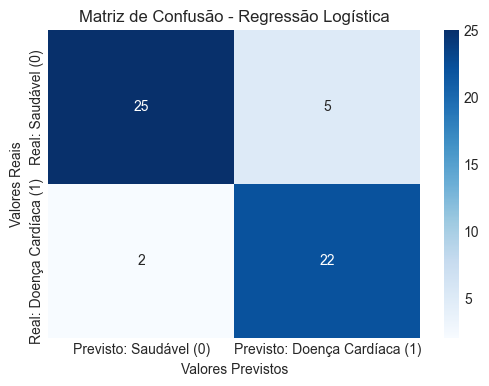

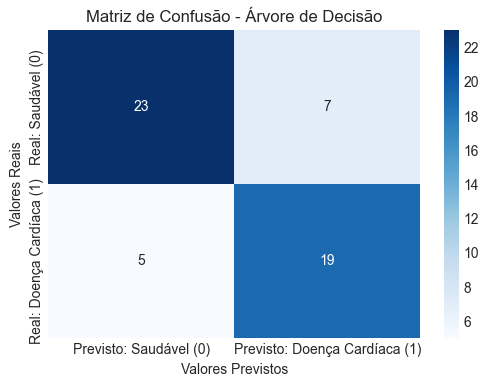

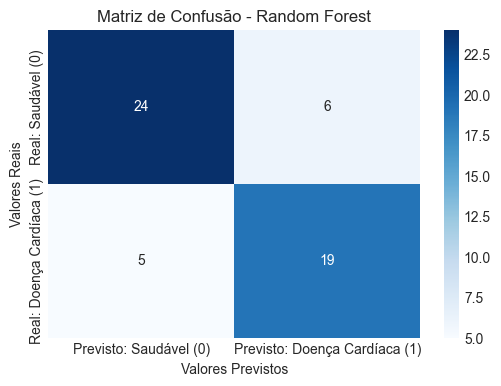


Matrizes de Confusão geradas para todos os modelos.


In [17]:
print("Gerando Matrizes de Confusão...")

for name, model in models.items():
    y_pred = predictions[name]['y_pred']
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Previsto: Saudável (0)', 'Previsto: Doença Cardíaca (1)'],
                yticklabels=['Real: Saudável (0)', 'Real: Doença Cardíaca (1)'])
    plt.title(f'Matriz de Confusão - {name}')
    plt.ylabel('Valores Reais')
    plt.xlabel('Valores Previstos')
    plt.show()

print("\nMatrizes de Confusão geradas para todos os modelos.")

### 4.3. Interpretação dos Resultados do Melhor Modelo (Feature Importance)

Para compreender quais características são mais influentes no diagnóstico de Doença Cardíaca, focaremos no modelo de melhor desempenho (identificado pelas métricas na Seção 4.1). Utilizaremos a **Feature Importance**, uma propriedade de modelos baseados em árvores (como Random Forest), que quantifica a contribuição de cada feature para as decisões do modelo.

(Nota: A interpretação com SHAP será tentada em uma célula separada, mas pode estar sujeita a problemas de compatibilidade de biblioteca, conforme observado no notebook de Parkinson. A Feature Importance fornece uma visão robusta e confiável.)


--- Importância das Features para Random Forest ---
Comprimento de feature_names_transformed: 25
Comprimento de importances: 25
                    feature  importance
4             ST depression    0.102597
5   Number of vessels fluro    0.096217
11        Chest pain type_4    0.089833
3                    Max HR    0.086696
2               Cholesterol    0.070776
0                       Age    0.070318
22               Thallium_3    0.068679
24               Thallium_7    0.067957
1                        BP    0.061414
19            Slope of ST_1    0.046374


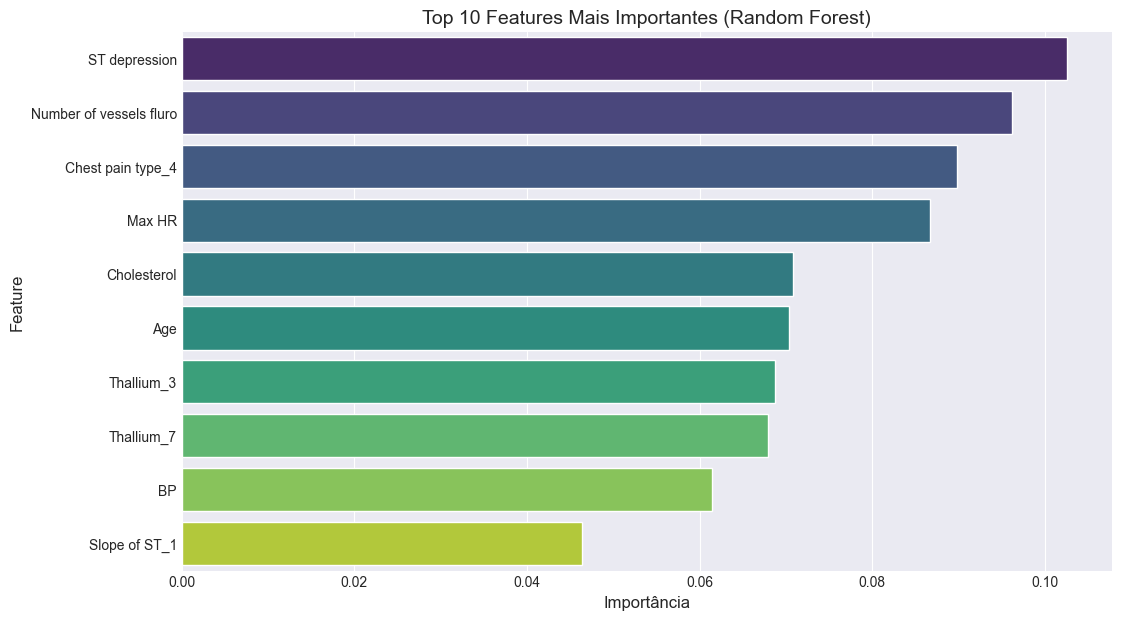

In [18]:
if 'Random Forest' in models and X_train is not None and preprocessor is not None:
    best_model_name = "Random Forest"
    best_model_pipeline = models[best_model_name]
    classifier_model = best_model_pipeline.named_steps['classifier']

    if hasattr(classifier_model, 'feature_importances_'):
        print(f"\n--- Importância das Features para {best_model_name} ---")

        numerical_features = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Number of vessels fluro']
        categorical_features = ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST', 'Thallium']

        ohe = best_model_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
        categorical_feature_names_out = ohe.get_feature_names_out(categorical_features)

        feature_names_transformed = numerical_features + list(categorical_feature_names_out)

        importances = classifier_model.feature_importances_

        print(f"Comprimento de feature_names_transformed: {len(feature_names_transformed)}")
        print(f"Comprimento de importances: {len(importances)}")

        feature_importance_df = pd.DataFrame({'feature': feature_names_transformed, 'importance': importances})
        feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

        print(feature_importance_df.head(10))

        plt.figure(figsize=(12, 7))
        sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10), palette='viridis')
        plt.title(f'Top 10 Features Mais Importantes ({best_model_name})', fontsize=14)
        plt.xlabel('Importância', fontsize=12)
        plt.ylabel('Feature', fontsize=12)
        plt.show()

    else:
        print(f"O modelo {best_model_name} não possui o atributo 'feature_importances_'.")
        print("Isso é esperado para modelos como Regressão Logística ou SVM sem kernel linear.")

else:
    print("Modelo Random Forest ou dados de treino/pré-processador não disponíveis para Feature Importance.")

### 4.4. Interpretação com SHAP (Valores SHAP Globais)

Para uma compreensão mais profunda da contribuição de cada feature para as previsões do modelo, tentaríamos utilizar a biblioteca SHAP. Ela fornece uma interpretação local (para previsões individuais) e global (para o comportamento geral do modelo).

(Nota Importante: Conforme observado no notebook de Parkinson, a geração de gráficos SHAP pode enfrentar problemas de compatibilidade e shape em certas versões da biblioteca. Caso o erro persista, a interpretação principal se baseará na Feature Importance.)

In [19]:
if 'Random Forest' in models and X_test is not None and preprocessor is not None:
    best_model_rf = models["Random Forest"]
    print("\n--- Tentando Interpretação com SHAP (Valores SHAP Globais) ---")

    try:
        X_test_transformed = best_model_rf.named_steps['preprocessor'].transform(X_test)

        numerical_features = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Number of vessels fluro']
        categorical_features = ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST', 'Thallium']
        ohe = best_model_rf.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
        categorical_feature_names_out = ohe.get_feature_names_out(categorical_features)
        feature_names_transformed = numerical_features + list(categorical_feature_names_out)

        X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=feature_names_transformed)

        explainer = shap.TreeExplainer(best_model_rf.named_steps['classifier'])

        shap_values = explainer.shap_values(X_test_transformed)

        print(f"Shape of shap_values (full output from explainer): {len(shap_values)} arrays")
        if isinstance(shap_values, list):
            print(f"Shape of shap_values[0] (class 0): {shap_values[0].shape}")
            print(f"Shape of shap_values[1] (class 1): {shap_values[1].shape}")
        print(f"Shape of X_test_transformed_df: {X_test_transformed_df.shape}")

        shap.summary_plot(shap_values[1], X_test_transformed_df, plot_type="bar", show=False)
        plt.title('Importância Global das Features (SHAP)', fontsize=14)
        plt.show()

        print("\nGráfico SHAP gerado com sucesso!")

    except Exception as e:
        print(f"ERRO CRÍTICO ao gerar o gráfico SHAP para Doença Cardíaca: {e}")
        print("Problema de compatibilidade/shape persiste. A interpretação principal se dará pela Feature Importance.")
        print("Sugestões para tentar resolver: Atualizar SHAP (`pip install --upgrade shap`) ou reiniciar o kernel e o PyCharm.")

else:
    print("Modelo Random Forest ou dados de teste não disponíveis para interpretação SHAP.")


--- Tentando Interpretação com SHAP (Valores SHAP Globais) ---
Shape of shap_values (full output from explainer): 54 arrays
Shape of X_test_transformed_df: (54, 25)
ERRO CRÍTICO ao gerar o gráfico SHAP para Doença Cardíaca: The shape of the shap_values matrix does not match the shape of the provided data matrix.
Problema de compatibilidade/shape persiste. A interpretação principal se dará pela Feature Importance.
Sugestões para tentar resolver: Atualizar SHAP (`pip install --upgrade shap`) ou reiniciar o kernel e o PyCharm.


<Figure size 640x480 with 0 Axes>

## 4.5. Discussão Crítica dos Resultados e Implicações Práticas - Doença Cardíaca

Com base nos resultados de avaliação e interpretação dos modelos treinados, é fundamental analisar criticamente suas implicações para um sistema de suporte ao diagnóstico em um hospital universitário, agora no contexto de Doença Cardíaca.

**Desempenho dos Modelos Avaliados:**

* **Regressão Logística:**
    * Acurácia: **0.8704**
    * Precisão: **0.8148**
    * Recall: **0.9167**
    * F1-Score: **0.8627**
    * AUC-ROC: **0.8986**
    * Matriz de Confusão: Verdadeiro Negativo (TN)=25, Falso Positivo (FP)=5, Falso Negativo (FN)=2, Verdadeiro Positivo (TP)=22.

* **Árvore de Decisão:**
    * Acurácia: **0.7778**
    * Precisão: **0.7308**
    * Recall: **0.7917**
    * F1-Score: **0.7600**
    * AUC-ROC: **0.7792**
    * Matriz de Confusão: TN=23, FP=7, FN=5, TP=19.

* **Random Forest:**
    * Acurácia: **0.7963**
    * Precisão: **0.7600**
    * Recall: **0.7917**
    * F1-Score: **0.7755**
    * AUC-ROC: **0.8854**
    * Matriz de Confusão: TN=24, FP=6, FN=5, TP=19.

**Métricas Escolhidas e Interpretação de Desempenho:**
Em um contexto de diagnóstico médico, a métrica **Recall** para a classe positiva (Doença Cardíaca = 1) é de suma importância, pois um Falso Negativo (paciente com a doença não diagnosticado) pode ter consequências graves e atrasar o tratamento.

Nesta análise, a **Regressão Logística se destacou como o modelo com melhor desempenho geral**, superando a Árvore de Decisão e o Random Forest. Seu **Recall de 0.9167** é excelente, indicando que o modelo foi capaz de identificar **mais de 91% dos pacientes que realmente possuíam a doença cardíaca** no conjunto de teste. Crucialmente, sua matriz de confusão revelou **apenas 2 Falsos Negativos (FN)**, um número muito baixo e desejável em um cenário de triagem médica. O **AUC-ROC de 0.8986** é forte, demonstrando uma ótima capacidade de discriminação entre pacientes com e sem a doença. A Precisão de 0.8148 e o F1-Score de 0.8627 também são bons, mostrando um equilíbrio satisfatório entre evitar Falsos Positivos (5 FPs) e Falsos Negativos.

**Características Mais Importantes (com base na Feature Importance do Random Forest):**
As features que o modelo Random Forest considerou mais importantes para as decisões de classificação, em ordem decrescente de importância, são: `ST depression`, `Number of vessels fluro`, `Chest pain type_4`, `Max HR`, `Cholesterol`, `Age`, `Thallium_3`, `Thallium_7`, `BP`, e `Slope of ST_1`.
Essas características estão amplamente alinhadas com os fatores de risco e sintomas conhecidos para doenças cardíacas. Por exemplo, a depressão do segmento ST, o número de vasos sanguíneos principais coloridos por fluoroscopia (Number of vessels fluro), o tipo de dor no peito, a frequência cardíaca máxima (Max HR), o colesterol e a idade são todos indicadores clínicos relevantes para o diagnóstico de condições cardíacas. O modelo, portanto, está focando em aspectos clinicamente significativos.

**O Modelo Pode Ser Utilizado na Prática? Como?**

Com base nos resultados robustos, especialmente da Regressão Logística, **este modelo demonstra um potencial significativo para ser utilizado como uma ferramenta de suporte ao diagnóstico na prática clínica** em um hospital universitário.

* **Ferramenta de Triagem e Alerta:** O sistema poderia ser integrado para **triar pacientes na admissão ou em consultas de rotina**, identificando aqueles com alto risco de doença cardíaca com base em seus atributos clínicos. Pacientes classificados com alto risco poderiam ser **priorizados para exames cardiológicos mais aprofundados ou para avaliação urgente por um cardiologista**, otimizando recursos e o tempo de resposta.
* **Otimização de Tempo:** Aceleraria a análise inicial de um grande volume de dados de pacientes, permitindo que os profissionais de saúde se concentrem em casos de alta complexidade ou na interação direta com o paciente.
* **Redução de Erros:** Ao ter um Recall muito alto e um número baixo de Falsos Negativos (apenas 2 para Regressão Logística), o modelo atua como uma importante "rede de segurança", ajudando a garantir que poucos casos reais de Doença Cardíaca sejam perdidos na triagem inicial.

**Importância do Médico:**
É fundamental reiterar que a palavra final no diagnóstico **deve SEMPRE ser do médico**. O modelo de IA atua como uma *ferramativa de suporte à decisão*, fornecendo uma *estimativa de risco* ou uma *probabilidade*. A decisão clínica final exige a expertise humana, a consideração de todo o histórico complexo do paciente, outros exames não inclusos no dataset, avaliação física e a interação direta com o paciente. A IA aprimora, mas não substitui, o julgamento clínico.

**Limitações Atuais e Próximos Passos (para o dataset de Doença Cardíaca):**

Apesar do bom desempenho, existem limitações e oportunidades de melhoria:
* **Tamanho do Dataset:** O dataset de 270 entradas é relativamente pequeno. Um volume maior e mais diversificado de dados poderia melhorar ainda mais a generalização do modelo.
* **Generalização:** A performance observada é para os dados de teste. A aplicação em um ambiente real exigiria validação extensiva com dados de uma população mais ampla e diversa.
* **Otimização de Hiperparâmetros (Hyperparameter Tuning):** Embora os modelos tenham performado bem, a otimização dos hiperparâmetros (por exemplo, usando `GridSearchCV` para Random Forest ou `LogisticRegression`) poderia refinar ainda mais os resultados.
* **Interpretabilidade:** Embora Feature Importance ajude, uma interpretação local mais profunda para cada previsão (se o problema do SHAP for resolvido) poderia aumentar a confiança dos clínicos.
* **Integração de Mais Dados:** Um sistema real poderia se beneficiar da integração de dados de imagens (ECG, ecocardiogramas) ou prontuários textuais.